In [ ]:
### TODO
#
# - clean the graph to simplify the problem
#   - FORMAT 1
#        - for nodes with multiple transactions between themselves, keep only one directed adge - remove all others. This edge will contain the number of transactions and the average amount of those transactions
#
#
#
#

In [51]:
import pandas as pd
import networkx as nx
import numpy as np

# Read in the CSV files
accounts_df = pd.read_csv("data/accounts.csv")
transactions_df = pd.read_csv("data/transactions.csv")

# Create a directed graph
graph = nx.MultiDiGraph()
graph2 = nx.DiGraph()
graph3 = nx.DiGraph()

# Add nodes to the graph using the accounts DataFrame
for index, row in accounts_df.iterrows():
    graph.add_node(row["acct_id"], initial_deposit=row["initial_deposit"])
    graph2.add_node(row["acct_id"], initial_deposit=row["initial_deposit"])
    graph3.add_node(row["acct_id"])


# Add edges to the graph using the transactions DataFrame
for index, row in transactions_df.iterrows():
    graph.add_edge(row["orig_acct"], row["bene_acct"], base_amt=row["base_amt"], is_sar=row["is_sar"])

# Print out some information about the graph
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())


Number of nodes: 1446
Number of edges: 121457


In [80]:
'''
for node in graph.nodes:
    print(node, graph.nodes[node])
print("Edge information:")
for edge in graph.edges:
    print(edge, graph.edges[edge])
'''

for u in graph.nodes:
    graph2.nodes[u]["is_sar"] = False

for u in graph.nodes: #loop through nodes. Current node is u
    tsc_amts = []
    for v in graph.predecessors(u):#loop though in degree nodes v
        ### WRONG ###
        #e_v2u = graph.in_edges(v, data=True) #edges from 
        e_v2u = [(s, t, d) for (s, t, d) in graph.edges(v, data=True) if t == u]
        #print(e_v2u)
        #print(e_v2u)
        edge_tsc_amts = []
        is_sar = False
        if e_v2u:
            for edge in e_v2u: #for each edge from v to u
                
                src, dest, attrs = edge
                edge_tsc_amts.append(attrs["base_amt"])
                if attrs["is_sar"] == True:
                    is_sar = True
            
            #get stats on edges
            v2u_total = np.sum(edge_tsc_amts)
            v2u_mean = np.mean(edge_tsc_amts)
            v2u_min = np.min(edge_tsc_amts)
            v2u_max = np.max(edge_tsc_amts)
            v2u_std = np.std(edge_tsc_amts)
            v2u_is_sar = is_sar
            v2u_count = len(edge_tsc_amts)

            graph2.add_edge(v, u, total_tsc_amt=v2u_total, mean_tsc_amt=v2u_mean, min_tsc_amt=v2u_min, max_tsc_amt=v2u_max, std_tsc_amt=v2u_std, num_of_tsc=v2u_count, contains_is_sar_tsc=v2u_is_sar)
            graph3.add_edge(v, u, weight=v2u_total)

            if v2u_is_sar == True:
                graph2.nodes[u]["is_sar"] = True
                graph2.nodes[v]["is_sar"] = True
            

print("Number of nodes:", graph2.number_of_nodes())
print("Number of edges:", graph2.number_of_edges())
        

Number of nodes: 1446
Number of edges: 6984


In [4]:
import matplotlib.pyplot as plt
nodes_df = pd.DataFrame.from_dict(dict(graph2.nodes(data=True)), orient='index')
nodes_df.to_csv('accounts_cleaned.csv')
#nodes_df.is_sar.hist()
#np.sum(np.isnan(nodes_df.is_sar.tolist()))
#b = np.array(nodes_df.is_sar.tolist())
#print(len(b[b==True]), len(b[b==False]),len(b[b==True]) + len(b[b==False]), len(b[b==True])/(len(b[b==True]) + len(b[b==False])))

edges_df = pd.DataFrame([(u, v, d['total_tsc_amt'], d['mean_tsc_amt'], d['min_tsc_amt'], d['max_tsc_amt'], d['std_tsc_amt'], d['num_of_tsc'], d['contains_is_sar_tsc']) for u, v, d in graph2.edges(data=True)], columns=['source', 'target', 'total_tsc_amt','mean_tsc_amt', 'min_tsc_amt', 'max_tsc_amt', 'std_tsc_amt', 'num_of_tscs', 'contains_is_sar_tsc'])
edges_df.to_csv('transactions_cleaned.csv')


In [ ]:
print(nodes_df)
print(edges_df)

      initial_deposit  is_sar
0            96646.86   False
1            80707.36   False
2            52101.10   False
3            90324.40   False
4            91267.86   False
...               ...     ...
1441         61754.39   False
1442         88437.72   False
1443         84987.77   False
1444         50857.55   False
1445         75294.22   False

[1446 rows x 2 columns]
      source  target  total_tsc_amt  mean_tsc_amt  min_tsc_amt  max_tsc_amt  \
0          0      19       46768.99    563.481807        95.51       998.89   
1          0      20       43773.90    527.396386         6.79       995.51   
2          0     211        9541.32    454.348571       134.48       983.69   
3          1      11       10305.92    515.296000       179.59       971.46   
4          1      13       11016.91    550.845500       203.30       958.91   
...      ...     ...            ...           ...          ...          ...   
6979    1442      10       43147.67    519.851446       100.17

In [5]:
!pip3 install ConfigModel-MCMC

  Using cached ConfigModel_MCMC-0.0.10-py3-none-any.whl (27 kB)
  Using cached numba-0.49.1.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached arch-5.0.1.tar.gz (937 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached python-igraph-0.9.6.tar.gz (3.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.62.2-py2.py3-none-any.whl (76 kB)
  Using cached property_cached-1.6.4-py2.py3-none-any.whl (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.8 MB/s eta 0:00:0000:0100:01m
  Using cached llvmlite-0.32.1.tar.gz (104 kB)
  Preparing metadata (setup.py) ... done
  Using cached texttable-1.6.7-py2.py3-none-any.whl (10 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for arch (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [153 lines of output]
      /p

In [91]:
from   utils.graphConversion import __conversion__
import basicTests.basictest as bt
import localisation.localisationMeasures as lm
import netemdMethods.netEMDmeasures as nemdM
import pathFinder.pathFinder as pf
try:
    import community
except:
    print('Community detection package not found')

In [95]:
## Add netemd Statistics
results = {}
G = graph3.copy()
G1 = __conversion__(G)
G1[0]
pathRes = pf.pathFinderRandomComparision(G1,beamwidth=100,maxLen=5,reps=50)
results['Path of Size 5'] = {i:0 for i in range(len(G))}
results['Path of Size 6'] = {i:0 for i in range(len(G))}
for item in pathRes[0][2]:
    for x in item[0][1]:
        results['Path of Size 5'][x] += item[2]
for item in pathRes[0][3]:
    for x in item[0][1]:
        results['Path of Size 6'][x] += item[2]


results['GAW']    = bt.strengthDegree(G,1000,0.05)[0][2]
results['GAW10']  = bt.strengthDegree10(G,1000,0.05)[0][2]
results['GAW20']  = bt.strengthDegree20(G,1000,0.05)[0][2]
results['Std Degree']  = bt.getTotalDegree(G)[0][1]
G2 = G.to_undirected()
#coms=community.best_partition(G2)
#results['communityDensity'] = bt.subNetworkDensityTest(G,coms,1000)[0][1]

results['Feature Sum']={x:0 for x in G}
for item in results:
    if item!='Feature Sum':
        for x in results[item]:
            results['Feature Sum'][x]+=results[item][x]




0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [85]:
print(bt.strengthDegree10(G,1000,0.05)[0][2])

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 2.4092803121479585, 133: 0, 134: 0, 135: 0, 136:

dict_keys(['Path of Size 5', 'Path of Size 6', 'GAW', 'GAW10', 'GAW20', 'Std Degree', 'Feature Sum'])


{'bodies': [<matplotlib.collections.PolyCollection at 0x7fa624ae3970>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fa624abdb70>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fa624ac8310>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fa624ac86a0>}

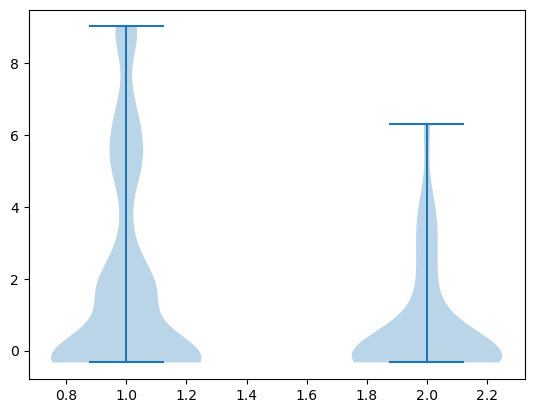

In [120]:
print(results.keys())
#np.sum(list(results['Feature Sum'].values()))
fs = np.array(list(results['Feature Sum'].values()))
fs_n = fs[y == 0]
fs_a = fs[y == 1]
plt.violinplot([fs_n, fs_a])

In [126]:
accounts_df['GAW'] = list(results['GAW'].values())
accounts_df['GAW10'] = list(results['GAW10'].values())
accounts_df['GAW20'] = list(results['GAW20'].values())
accounts_df['Std Degree'] = list(results['Std Degree'].values())
accounts_df['Feature Sum'] = list(results['Feature Sum'].values())
print(accounts_df)
nodes_df = accounts_df

      Unnamed: 0  initial_deposit  is_sar       GAW     GAW10     GAW20  \
0              0         96646.86   False  0.000000  0.000000  0.000000   
1              1         80707.36   False  1.739664  0.000000  0.000000   
2              2         52101.10   False  0.000000  0.000000  0.000000   
3              3         90324.40   False  0.000000  0.000000  0.000000   
4              4         91267.86   False  0.000000  0.000000  0.000000   
...          ...              ...     ...       ...       ...       ...   
1441        1441         61754.39   False  1.728403  0.000000  0.000000   
1442        1442         88437.72   False  0.000000  0.000000  0.000000   
1443        1443         84987.77   False  2.197678  2.512497  2.226600   
1444        1444         50857.55   False  1.655110  1.852625  1.675143   
1445        1445         75294.22   False  2.197678  2.512497  2.120475   

      Std Degree  Feature Sum  
0      -0.176790    -0.176790  
1       0.506128     2.245791  
2  

In [114]:
accounts_df = pd.read_csv("accounts_cleaned.csv")
transactions_df = pd.read_csv("transactions_cleaned.csv")

In [115]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.transforms import NormalizeFeatures

def visualize(h, color):
    z = TSNE(n_components=2, learning_rate='auto',
             init='random').fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

def print_model_size(model):
    tot = sum([p.numel() for p in model.parameters() if p.requires_grad])
    out = f"Number of model ({model.__class__.__name__}) parameters:{tot:10d}"
    print("=" * len(out))
    print(out)

2.0.0
Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [132]:
from torch.utils.data import random_split
# Define your graph
#x = torch.nn.functional.normalize(torch.tensor(nodes_df.initial_deposit.to_numpy()).unsqueeze(dim=1),dim=0).to(torch.float32)  # (n x features)
x = torch.nn.functional.normalize(torch.tensor(np.array(nodes_df[['initial_deposit','GAW','GAW10','GAW20','Std Degree','Feature Sum']].values,dtype='float32')),dim=0).to(torch.float32)  # (n x features)
edge_index =  torch.stack([torch.tensor(edges_df.source.to_numpy()),torch.tensor(edges_df.target.to_numpy())],dim=-1).T  # Define your edge index
edge_attr = torch.nn.functional.normalize(torch.tensor(np.array(edges_df[['total_tsc_amt','mean_tsc_amt', 'min_tsc_amt', 'max_tsc_amt', 'std_tsc_amt', 'num_of_tscs', 'contains_is_sar_tsc']].values,dtype='float32')),dim=0) # edge features
y =  torch.tensor(nodes_df.is_sar.to_numpy().astype(int)) # target values

train_size = int(0.6 * len(y))  # 60% of the dataset for training
val_size = int(0.2 * len(y))    # 20% of the dataset for validation
test_size = len(y) - train_size - val_size  # Remaining 20% for testing

train_dataset, val_dataset, test_dataset = random_split(y, [train_size, val_size, test_size])

# Create masks for train, validation, and test sets
train_mask = torch.zeros(len(y), dtype=torch.bool)
val_mask = torch.zeros(len(y), dtype=torch.bool)
test_mask = torch.zeros(len(y), dtype=torch.bool)

train_mask[train_dataset.indices] = True
val_mask[val_dataset.indices] = True
test_mask[test_dataset.indices] = True

In [127]:
x = torch.nn.functional.normalize(torch.tensor(np.array(nodes_df[['initial_deposit','GAW','GAW10','GAW20','Std Degree','Feature Sum']].values,dtype='float32')),dim=0).to(torch.float32)  # (n x features)
x

tensor([[ 0.0332,  0.0000,  0.0000,  0.0000, -0.0046, -0.0013],
        [ 0.0277,  0.0326,  0.0000,  0.0000,  0.0133,  0.0169],
        [ 0.0179,  0.0000,  0.0000,  0.0000,  0.0123,  0.0035],
        ...,
        [ 0.0292,  0.0412,  0.0560,  0.0510, -0.0086,  0.0498],
        [ 0.0175,  0.0310,  0.0413,  0.0383, -0.0086,  0.0366],
        [ 0.0259,  0.0412,  0.0560,  0.0485, -0.0086,  0.0490]])

In [154]:
edge_attr.dtype

torch.float32

In [133]:
from torch_geometric.data import Data
# Load your data into PyTorch Geometric's Data class
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y,train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)


In [134]:
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')

print('==============================')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Is weighted: {data.edge_weight is not None}')

print('==============================')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Number of nodes: 1446
Number of edges: 6984
Average node degree: 4.83
Has isolated nodes: True
Has self-loops: False
Is undirected: False
Is weighted: False
Number of training nodes: 867
Training node label rate: 0.60


In [135]:
import torch

from torch.nn import Linear
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import degree

def random_walk_matrix(edge_index, num_nodes: int = None):
    source, target = edge_index[0], edge_index[1]
    in_deg = degree(target, num_nodes=num_nodes)   # D
    edge_weight = 1 / in_deg[target]               # D^-1 A
    return edge_index, edge_weight


class MPNN(MessagePassing):
    def __init__(self, in_channels: int, out_channels: int, in_channels2: int):
        super().__init__(aggr="add")                         # "sum" aggregation
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.lin_message = Linear(in_channels, out_channels, # weights 𝚯_1
                                  bias=False)
        self.lin_update = Linear(in_channels2, out_channels,  # weights 𝚯_2
                                 bias=True)                  # the bias vector 𝐛
        
        self.lin1 = Linear(in_channels, out_channels)
        self.lin2 = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr=None):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]
        # edge_attr has shape [E, edge_dim]
        #print('x', x.size())
        #print('edge_index', edge_index.size())
        #print('edge_attr', edge_attr.size())

        if edge_attr is None:
            edge_attr = torch.ones((edge_index.size(1), 1), device=x.device)
        # 1. m_j→𝑖 = x_j𝚯_1
        m_ji = self.lin_message(x)  # we can project here with isotropic GNNs
        #m_ji = x  # I decided since we only have one feature, it doesnt make sense to apply a linear to dim 16
        # 2. m_𝑖 = add(ã_ji ⋅ m_j→𝑖)_j∈𝑁(i)
        #print('mji', m_ji.size())
        m_i = self.propagate(edge_index, m=m_ji, edge_attr=edge_attr)
        # 3. h_𝑖 = tanh(x_i𝚯_2 + m_i + 𝐛)
        #print('mi', m_i.size())
        #h_i = torch.tanh(self.lin_update(x) + m_i)
        a = torch.cat([x, m_i], dim=-1)
        #print('ehh')
        #print('here', a.size())
        #print('ehh2')
        
        #print()
        #print('here2', self.lin_update(a).size())
        h_i = torch.tanh(self.lin_update(a))
        return h_i

    def message(self, m_j, edge_attr):
        # x_j has shape [E, in_channels]
        # edge_attr has shape [E, edge_dim]

        #print(m_j)
        #print(m_j.size())
        #print(edge_attr.size())
        #return edge_attr.reshape(-1, 1) * m_j
        #return edge_attr.view(-1, 1) * m_j
        return torch.cat([m_j, edge_attr], dim=-1)
        
        #The code return edge_attr.view(-1, 1) * x_j multiplies the input message x_j with the edge attributes edge_attr.
        #Here, x_j represents the message passed from the node j to its neighbor node i, and edge_attr represents the corresponding edge attribute associated with the edge connecting the nodes i and j.
        #The view(-1, 1) method call is used to reshape edge_attr to have one column and as many rows as there are messages passed between nodes. This is done so that the multiplication operation between x_j and edge_attr can be performed element-wise between the corresponding rows of x_j and edge_attr.
        #The resulting tensor has the same shape as x_j and represents the transformed messages to be aggregated by the receiving node i.

#    def message(self, m_j, edge_weight):
#        return edge_weight.view(-1, 1) * m_j  # ã_ji ⋅ m_j→𝑖


In [136]:
gso_index, gso_weight = random_walk_matrix(data.edge_index, data.num_nodes)
print(f"Edge weights: {gso_weight}")
print(gso_index)

Edge weights: tensor([0.0123, 0.0128, 0.3333,  ..., 0.5000, 0.1250, 0.0204])
tensor([[   0,    0,    0,  ..., 1443, 1444, 1445],
        [  19,   20,  211,  ...,  557,  159,    8]])


In [131]:
edge_attr.size(1)

7

In [139]:
import torch

from torch.nn import Linear

HIDDEN_SIZE = 16 #@param
NUM_LAYERS = 2 #@param

dataset_num_node_features = x.size(1)
dataset_num_edge_features = edge_attr.size(1)
dataset_num_classes = 2

class GNNModel(torch.nn.Module):

    def __init__(self, hidden_size: int,
                 num_layers: int = 1):
        super().__init__()
        torch.manual_seed(12345)

        self.mpnns = torch.nn.ModuleList()
        for l in range(num_layers):
            #in_size = dataset_num_features if l == 0 else hidden_size
            in_size = dataset_num_node_features if l == 0 else hidden_size
            in_size2 = hidden_size + dataset_num_node_features + dataset_num_edge_features if l == 0 else hidden_size*2 + dataset_num_edge_features
            mpnn = MPNN(in_channels=in_size, out_channels=hidden_size, in_channels2=in_size2)
            self.mpnns.append(mpnn)

        self.lin_out = Linear(hidden_size, dataset_num_classes)
    
    def forward(self, x, edge_index, edge_attr=None):
        # Message-passing: transform node features based on neighbors
        for mpnn in self.mpnns:
            #x = mpnn(x, edge_index, edge_weight)
            x = mpnn(x, edge_index, edge_attr=edge_attr)
        # Decoder: post-process extracted features
        out = self.lin_out(x)
        return out

model = GNNModel(HIDDEN_SIZE, NUM_LAYERS)
print(model)
print_model_size(model)

GNNModel(
  (mpnns): ModuleList(
    (0): MPNN(6, 16)
    (1): MPNN(16, 16)
  )
  (lin_out): Linear(in_features=16, out_features=2, bias=True)
)
Number of model (GNNModel) parameters:      2434


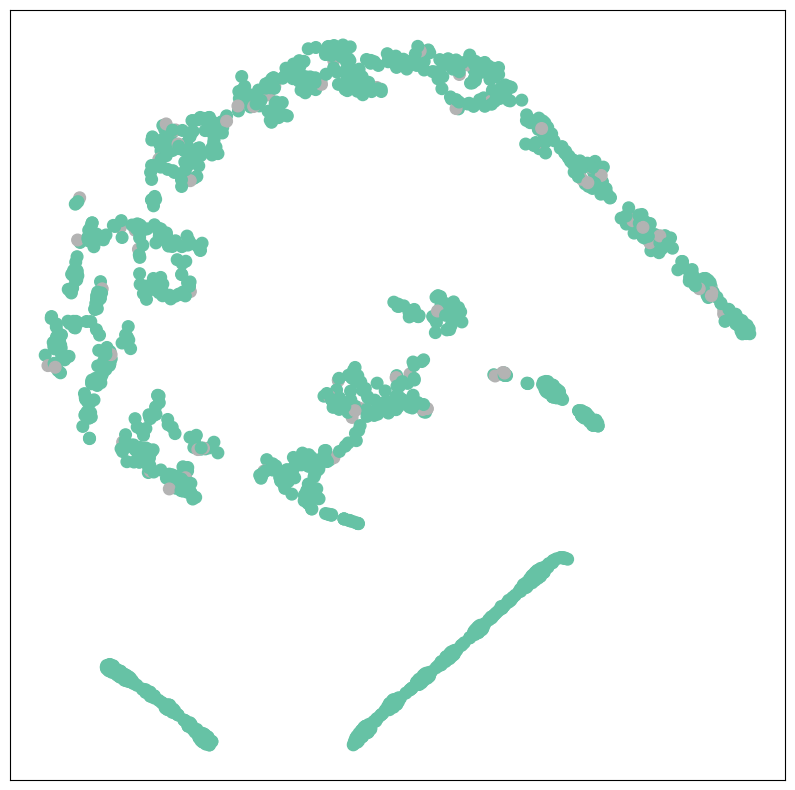

In [140]:
model = GNNModel(HIDDEN_SIZE, NUM_LAYERS)
model.eval()

out = model(data.x, data.edge_index, edge_attr=data.edge_attr)
visualize(out, color=data.y)

In [170]:
sum(data.y.isnan())

tensor(0)

In [159]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100})'''))

model = GNNModel(HIDDEN_SIZE, NUM_LAYERS)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
      model.train()
      optimizer.zero_grad()
      # We now give as input also the graph connectivity
      #out = model(data.x, gso_index, gso_weight)
      out = model(data.x, data.edge_index, data.edge_attr)
      print(len(out[data.train_mask]),len(data.y[data.train_mask]))
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index, data.edge_attr)
      pred = out.argmax(dim=1)
      test_correct = pred[mask] == data.y[mask]
      test_acc = int(test_correct.sum()) / int(mask.sum())
      test_out = out[mask]
      test_pred = pred[mask]
      return test_acc, test_out, test_pred

for epoch in range(1, 401):
    train_loss = train()
    val_loss, _, _ = test(data.val_mask)
    print(f'Epoch: {epoch:03d} - Training loss: {train_loss:.4f} - '
          f'Validation accuracy: {val_loss * 100:.2f}%')

<IPython.core.display.Javascript object>

867 867
Epoch: 001 - Training loss: 0.5354 - Validation accuracy: 94.46%
867 867
Epoch: 002 - Training loss: 0.4115 - Validation accuracy: 94.46%
867 867
Epoch: 003 - Training loss: 0.3437 - Validation accuracy: 94.46%
867 867
Epoch: 004 - Training loss: 0.3043 - Validation accuracy: 94.46%
867 867
Epoch: 005 - Training loss: 0.2793 - Validation accuracy: 94.46%
867 867
Epoch: 006 - Training loss: 0.2596 - Validation accuracy: 94.46%
867 867
Epoch: 007 - Training loss: 0.2463 - Validation accuracy: 94.46%
867 867
Epoch: 008 - Training loss: 0.2364 - Validation accuracy: 94.46%
867 867
Epoch: 009 - Training loss: 0.2283 - Validation accuracy: 94.46%
867 867
Epoch: 010 - Training loss: 0.2213 - Validation accuracy: 94.46%
867 867
Epoch: 011 - Training loss: 0.2151 - Validation accuracy: 94.46%
867 867
Epoch: 012 - Training loss: 0.2095 - Validation accuracy: 94.46%
867 867
Epoch: 013 - Training loss: 0.2046 - Validation accuracy: 94.46%
867 867
Epoch: 014 - Training loss: 0.2003 - Valida

In [162]:
test_acc, test_out, test_pred  = test(data.test_mask)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(test_pred)


Test Accuracy: 97.93%
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


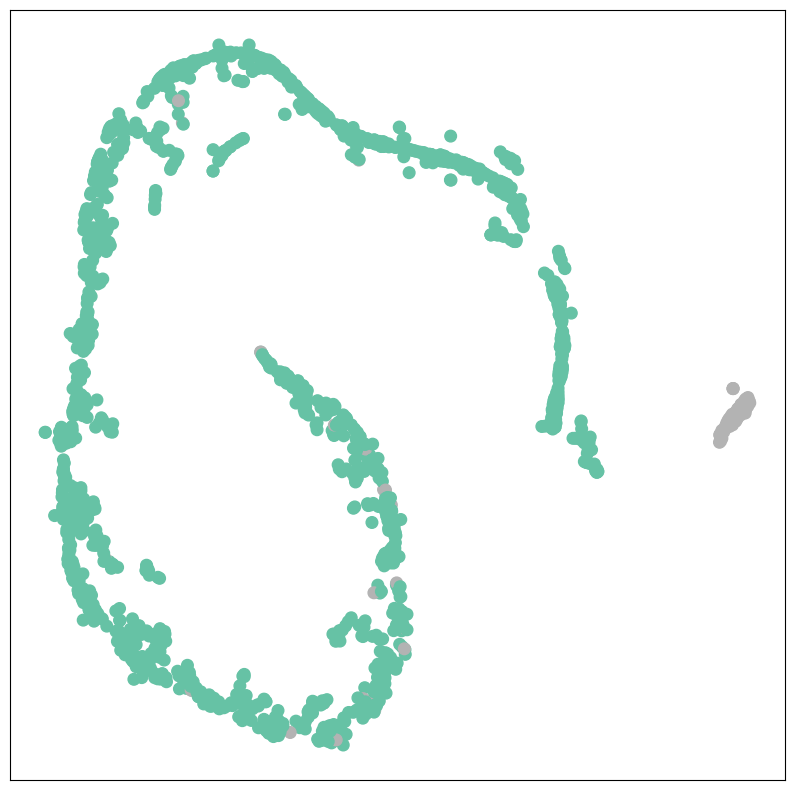

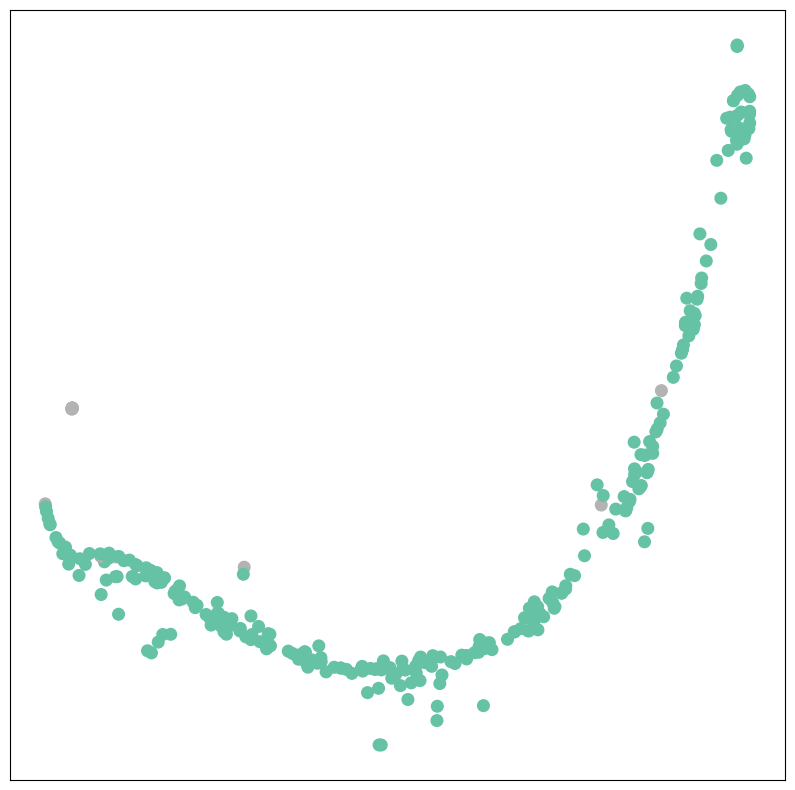

In [158]:
out = model(data.x, data.edge_index, data.edge_attr)
visualize(out, color=data.y)
visualize(out[data.test_mask], color=data.y[data.test_mask])

[0.01416384 0.01190513 0.02994873 0.01751748 0.02467579 0.00206843
 0.00506531 0.00255363 0.00388179 0.05750708 0.13357441 0.00220226
 0.03179126 0.048206   0.03575776 0.01662974 0.924182   0.04035471
 0.00822268 0.00787039 0.0038183  0.03007411 0.00664612 0.1899013
 0.02512836 0.05696928 0.00907676 0.06504549 0.00687707 0.05690764
 0.05813066 0.00802652 0.01952644 0.02840041 0.039338   0.03718273
 0.11220638 0.07390294 0.09880697 0.01310091 0.00883095 0.02970724
 0.0053674  0.9833218  0.01693508 0.02537336 0.0304957  0.03119296
 0.00345121 0.0225183  0.01366995 0.9564135  0.05022194 0.01519203
 0.03364982 0.01023607 0.01489997 0.00485764 0.01179108 0.036831
 0.00615799 0.01397653 0.01206975 0.00609687 0.0470253  0.00915068
 0.0695663  0.01377437 0.02249104 0.01463097 0.01453905 0.0157346
 0.0112501  0.0286123  0.00837197 0.01032765 0.02621784 0.00338563
 0.00363473 0.00352757 0.0035104  0.04666201 0.00322464 0.10049473
 0.01216434 0.02354943 0.02051982 0.03488108 0.00325031 0.04074736

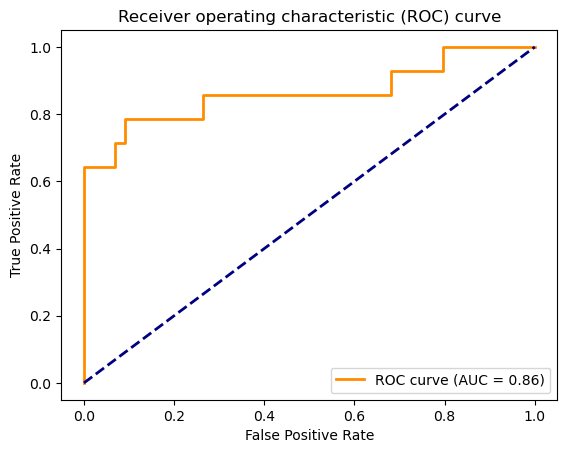

In [165]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
import torch.nn.functional as F

y_true = data.y[data.test_mask]
y_pred = softmax_x = F.softmax(test_out, dim=1)
y_pred = y_pred[:, 1].detach().numpy()
print(y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, test_pred, average='binary')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [194]:
print(len(data.y[data.test_mask]))
print(len(y_pred))
orig_test_y = data.y[data.test_mask]
b = test_pred == orig_test_y
c = b[orig_test_y == 1]
print(np.sum(c.numpy()/len(c)))

c

290
290
0.5714285714285713


tensor([False,  True, False, False, False,  True,  True, False, False,  True,
         True,  True,  True,  True])